In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pickle

In [2]:
from plots import plot_radar_cases

In [3]:
RANDOM_STATE = 0

In [4]:
f = open("res_breslow_dict.pkl", "rb")
res_breslow_dict = pickle.load(f)
f.close()

f = open("res_serum_dict.pkl", "rb")
res_serum_dict = pickle.load(f)
f.close()

f = open("res_all_dict.pkl", "rb")
res_all_dict = pickle.load(f)
f.close()

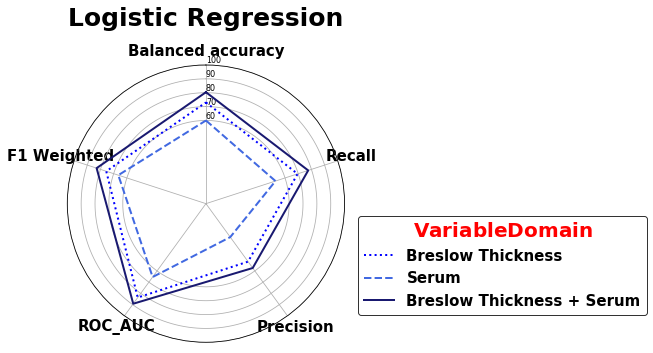

In [6]:
plt.figure(figsize=(10,5))
plot_radar_cases(list_res_cv=[res_breslow_dict['LogReg'],
                             res_serum_dict['LogReg'],
                             res_all_dict['LogReg']])
pass
#plt.savefig('plots/scores_radar.svg', dpi=300)

In [7]:
res_cv = res_all_dict['LogReg']
n_folds = 50.
feature_names = ['Breslow', 'GM-CSF', 'IL-4', 'IL-6', 'IL-10', 
                 'IL-17A', r'IFN-$\gamma$', r'TGF-$\beta$', 'DCD']
participation= 100*np.array([estim.best_estimator_.named_steps['feat'].get_support() 
                         for estim in res_cv['estimator']]).sum(axis=0)/n_folds

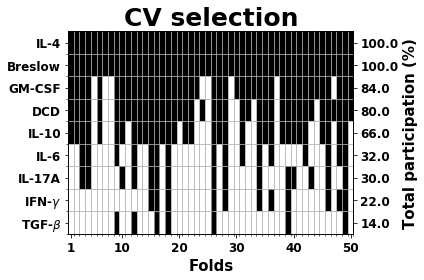

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.imshow(1-np.array([estim.best_estimator_.named_steps['feat'].get_support() 
                    for estim in res_cv['estimator']]).T[np.argsort(participation)[::-1],:],aspect='auto', cmap='gray')
ax1.set_xlabel("Folds", size=15, fontweight='bold')
ax1.set_xticks([0,9,19,29,39,49])
ax1.set_xticklabels(["1", "10", "20","30","40","50"], size=12, fontweight='bold')

ax1.set_yticks(np.arange(len(feature_names)))
ax1.set_yticklabels(np.array(feature_names)[np.argsort(participation)[::-1]],
                   size=12, fontweight='bold')
ax1.set_yticks(0.5 + np.arange(len(feature_names)), minor=True)
ax1.set_xticks(0.5 + np.arange(n_folds), minor=True)
ax1.grid(which='minor')
ax2= ax1.twinx()

ax2.set_ylim([0,9])
ax2.set_yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], minor=False)
ax2.set_yticklabels(participation[np.argsort(participation)],
                   size=12, fontweight='bold', minor=False)
ax1.autoscale(False)
ax2.autoscale(False)
ax2.set_ylabel("Total participation (%)", size=15, fontweight="bold")
plt.title("CV selection", size=25, fontweight="bold")
plt.tight_layout()
pass
#plt.savefig('plots/participation_cv.svg', dpi=300)